In [2]:
# Cell 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set plotting style
sns.set_style("whitegrid")

print("Libraries imported successfully.")

Libraries imported successfully.


In [3]:
# Cell 2: Load the Dataset
# Make sure 'dataset.csv' is in the same directory as this notebook
try:
    df = pd.read_csv('dataset.csv')
    print("Dataset loaded successfully.")
    print("Dataset shape:", df.shape)
except FileNotFoundError:
    print("Error: dataset.csv not found. Please place it in the 'notebooks' directory.")

df.head()

Dataset loaded successfully.
Dataset shape: (312, 12)


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",$24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded
1,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,NaN,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
2,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,NaN,$5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8
3,"Pickleball Doormat, Welcome Doormat Absorbent ...",VEWETOL,The decorative doormat features a subtle textu...,$13.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/61vz1Igl...,Contrence,"24""L x 16""W",NaN,Rubber,A5589,8fd9377b-cfa6-5f10-835c-6b8eca2816b5
4,JOIN IRON Foldable TV Trays for Eating Set of ...,JOIN IRON Store,Set of Four Folding Trays With Matching Storag...,$89.99,"['Home & Kitchen', 'Furniture', 'Game & Recrea...",['https://m.media-amazon.com/images/I/41p4d4VJ...,NaN,"18.9""D x 14.2""W x 26""H",NaN,Iron,Grey Set of 4,bdc9aa30-9439-50dc-8e89-213ea211d66a


In [4]:
# Cell 2: Load the Dataset
# Make sure 'dataset.csv' is in the same directory as this notebook
try:
    df = pd.read_csv('dataset.csv')
    print("Dataset loaded successfully.")
    print("Dataset shape:", df.shape)
except FileNotFoundError:
    print("Error: dataset.csv not found. Please place it in the 'notebooks' directory.")

df.head()

Dataset loaded successfully.
Dataset shape: (312, 12)


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",$24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded
1,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,NaN,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
2,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,NaN,$5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8
3,"Pickleball Doormat, Welcome Doormat Absorbent ...",VEWETOL,The decorative doormat features a subtle textu...,$13.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/61vz1Igl...,Contrence,"24""L x 16""W",NaN,Rubber,A5589,8fd9377b-cfa6-5f10-835c-6b8eca2816b5
4,JOIN IRON Foldable TV Trays for Eating Set of ...,JOIN IRON Store,Set of Four Folding Trays With Matching Storag...,$89.99,"['Home & Kitchen', 'Furniture', 'Game & Recrea...",['https://m.media-amazon.com/images/I/41p4d4VJ...,NaN,"18.9""D x 14.2""W x 26""H",NaN,Iron,Grey Set of 4,bdc9aa30-9439-50dc-8e89-213ea211d66a


In [5]:
# Cell 3: Initial Data Exploration
# Display basic information about the dataframe
print("Dataset Info:")
df.info()

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               312 non-null    object
 1   brand               312 non-null    object
 2   description         159 non-null    object
 3   price               215 non-null    object
 4   categories          312 non-null    object
 5   images              312 non-null    object
 6   manufacturer        205 non-null    object
 7   package_dimensions  306 non-null    object
 8   country_of_origin   125 non-null    object
 9   material            218 non-null    object
 10  color               265 non-null    object
 11  uniq_id             312 non-null    object
dtypes: object(12)
memory usage: 29.4+ KB

Missing Values per Column:
title                   0
brand                   0
description           153
price                  97
categories              0
images   

In [6]:
# Cell 4: Data Cleaning
# Reasoning: We need to clean the data to make it usable for analysis and modeling.
# - The 'price' column is an object type with '$' and commas. We need to convert it to a float.
# - Many columns have missing values that should be handled. We'll fill text columns with 'N/A'.

# Function to clean the price column
def clean_price(price):
    if isinstance(price, str):
        # Remove the dollar sign and any commas
        price = re.sub(r'[$,]', '', price)
        try:
            return float(price)
        except ValueError:
            return None # Return None if conversion fails
    return price

# Apply the cleaning function
df['price'] = df['price'].apply(clean_price)

# Fill missing text-based columns with 'N/A'
text_cols = ['description', 'brand', 'material', 'color', 'manufacturer', 'country_of_origin']
for col in text_cols:
    df[col] = df[col].fillna('N/A')

# Drop rows where price is still missing after cleaning
df.dropna(subset=['price'], inplace=True)

print("Data cleaning complete.")
print("\nMissing Values after Cleaning:")
print(df.isnull().sum())

Data cleaning complete.

Missing Values after Cleaning:
title                 0
brand                 0
description           0
price                 0
categories            0
images                0
manufacturer          0
package_dimensions    6
country_of_origin     0
material              0
color                 0
uniq_id               0
dtype: int64


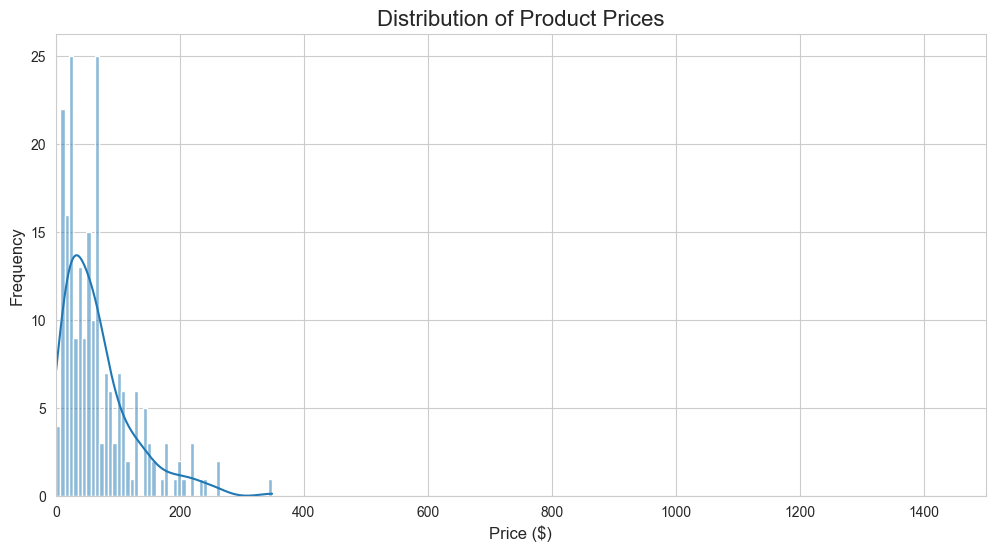

In [7]:
# Cell 5: EDA - Price Distribution (Corrected)
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 1500)

# 1. Save the plot FIRST
plt.savefig('outputs/price_distribution.png')

# 2. THEN show the plot
plt.show()

C:\Users\kuhum\AppData\Local\Temp\ipykernel_13156\967065748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


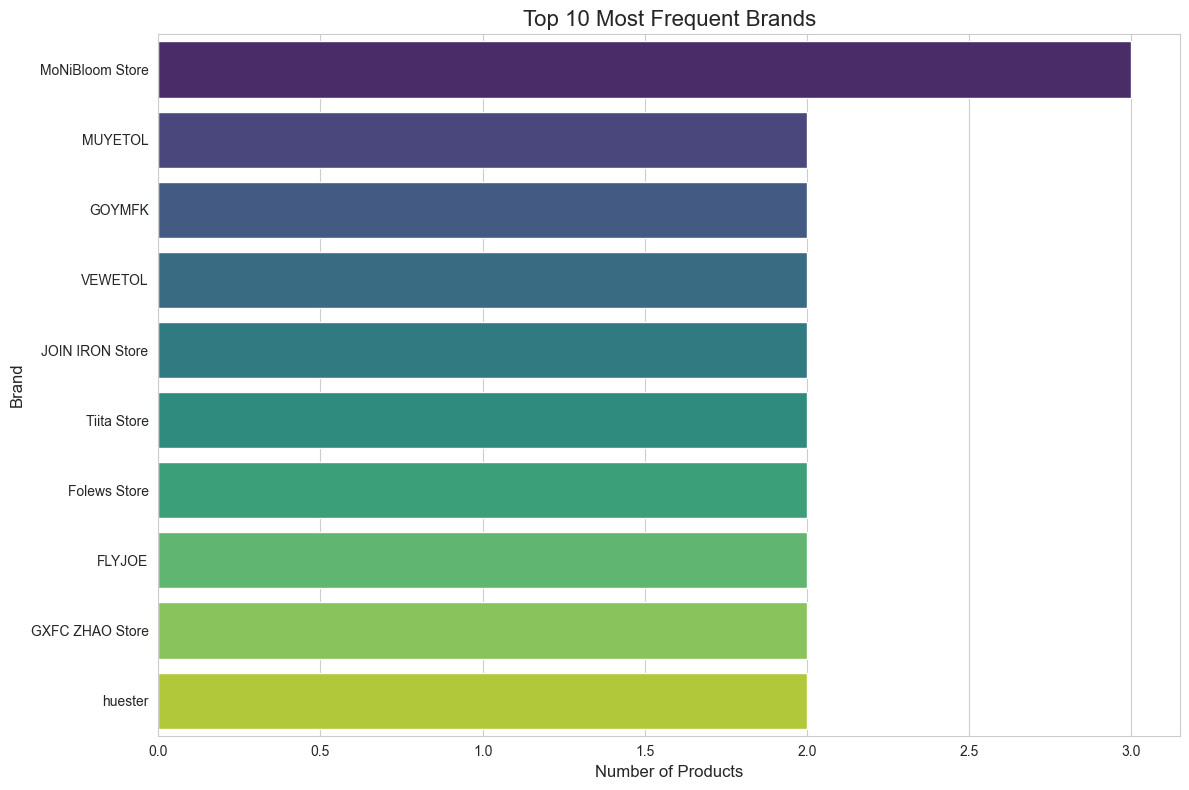

In [8]:
# Cell 6: EDA - Top 10 Brands
# Reasoning: Identifying popular brands is key for marketing and inventory.
plt.figure(figsize=(12, 8))
top_brands = df['brand'].value_counts().nlargest(10)
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top 10 Most Frequent Brands', fontsize=16)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.tight_layout()


# Save the plot
plt.savefig('outputs/top_brands.png')
plt.show()

C:\Users\kuhum\AppData\Local\Temp\ipykernel_13156\599082031.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_materials.values, y=top_materials.index, palette='plasma')


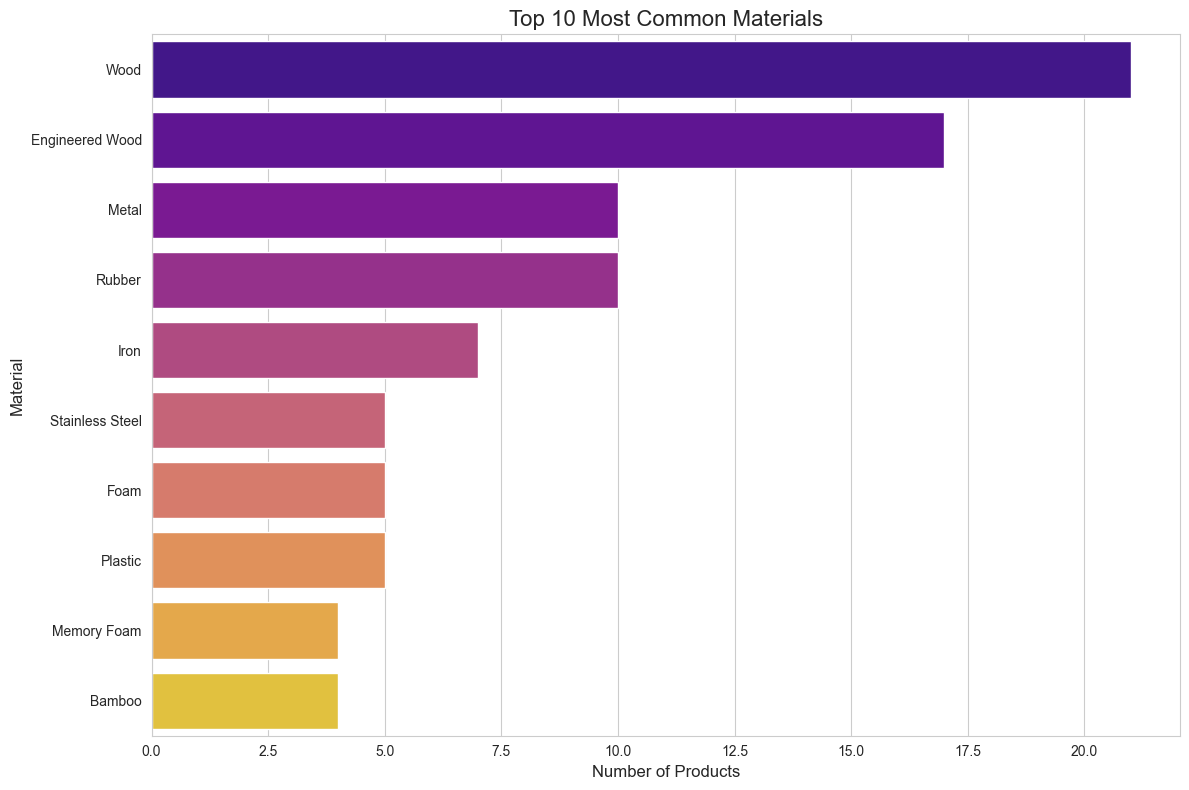

In [9]:
# Cell 7: EDA - Top 10 Materials
# Reasoning: Understanding the common materials helps to understand product trends.
plt.figure(figsize=(12, 8))
# Filter out 'N/A' before counting
top_materials = df[df['material'] != 'N/A']['material'].value_counts().nlargest(10)
sns.barplot(x=top_materials.values, y=top_materials.index, palette='plasma')
plt.title('Top 10 Most Common Materials', fontsize=16)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Material', fontsize=12)
plt.tight_layout()


# Save the plot
plt.savefig('outputs/top_materials.png')
plt.show()

In [10]:
# Cell 8: Save the cleaned data for the next step
# Reasoning: We will use this cleaned CSV in our next notebook to avoid repeating the cleaning steps.
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved to 'cleaned_dataset.csv'")

Cleaned dataset saved to 'cleaned_dataset.csv'
